In [1]:
import dmg.gallery as gallery
import dmg.dgmg as dgmg
import dmg.gmg_linear as gmg_linear
import dmg.classical_amg as classical_amg
import pyamg
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import xlsxwriter

## A Simple a(x,y)  = 3+x+2*y with GMM

In [2]:
n = 15
num_levels = 2
def u_real(x, y): return np.sin(np.pi*3*x)*np.sin(np.pi*5*y)
def rightf(x, y): return 34*np.pi**2*np.sin(3*np.pi*x)*np.sin(5*np.pi*y)*(x + 2*y + 3) - 10*np.pi*np.cos(5*np.pi*y)*np.sin(3*np.pi*x) - 3*np.pi*np.cos(3*np.pi*x)*np.sin(5*np.pi*y)
def a(x, y): return 3+x+2*y

In [3]:
h=1/(n-1)
kx = np.zeros([n,n+1])
ky = np.zeros([n+1,n])
for i in range(n):
    for j in range(n+1):
        kx[i][j] = a((j-0.5)*h,i*h)
for i in range(n+1):
    for j in range(n):
        ky[i][j] = a(j*h,(i-0.5)*h)    
A = gallery.nonlinearPoisson((n,n), kx, ky)

In [4]:
x0 = np.random.randn(A.shape)
x = np.linspace(0, 1, num=n+1, endpoint=False)
y = np.linspace(0, 1, num=n+1, endpoint=False)
xx, yy = np.meshgrid(x[1:], y[1:])
rhs = rightf(xx,yy)/ (n+1)**2
rhs = rhs.reshape(A.shape, 1)

In [5]:
linear_gmg = gmg_linear.LinearGMG(A, max_levels=num_levels)
print(linear_gmg)
GMM_rho = linear_gmg.compute_rho()
print("Spectral radius = {}".format(GMM_rho))

Dimension of matrix A for levels:
Level = 0, dimension = (7, 7)
Level = 1, dimension = (15, 15)

Spectral radius = 0.19045945587518268


[1.04888986e+01 1.42614585e+00 2.16242886e-01 3.46107915e-02
 5.72087177e-03 9.66725820e-04 1.66150782e-04 2.89594464e-05
 5.10913687e-06 9.11101440e-07 1.64035541e-07 2.97848986e-08
 5.44879384e-09 1.00329957e-09 1.85775717e-10 3.45619120e-11]


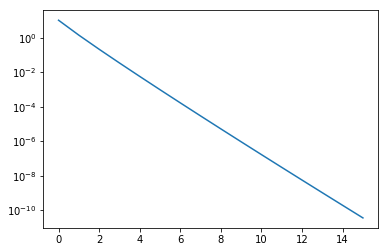

In [6]:
x = linear_gmg.solve(rhs, x0, tol=1e-10)
print(linear_gmg.get_gmg_convergence())
plt.semilogy(linear_gmg.get_gmg_convergence())

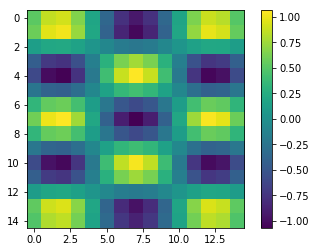

In [7]:
x = x.reshape(A.dim)
plt.imshow(x)
plt.colorbar()

## GMM

In [8]:
n = 63
num_levels = 2
e1 = 1/5
e2 = 1/13
e3 = 1/17
e4 = 1/31
e5 = 1/65
def u_real(x, y): return np.sin(np.pi*3*x)*np.sin(np.pi*5*y)
def rightf(x, y): return 34*np.pi**2*np.sin(3*np.pi*x)*np.sin(5*np.pi*y)*(np.sin(4*x**2*y**2)/6 + (np.sin((2*np.pi*y)/e2) + 11/10)/(6*(np.cos((2*np.pi*x)/e2) + 11/10)) + (np.cos((2*np.pi*x)/e3) + 11/10)/(6*(np.sin((2*np.pi*y)/e3) + 11/10)) + (np.sin((2*np.pi*y)/e4) + 11/10)/(6*(np.cos((2*np.pi*x)/e4) + 11/10)) + (np.cos((2*np.pi*x)/e5) + 11/10)/(6*(np.sin((2*np.pi*y)/e5) + 11/10)) + (np.sin((2*np.pi*x)/e1) + 11/10)/(6*(np.sin((2*np.pi*y)/e1) + 11/10)) + 1/6) - 3*np.pi*np.cos(3*np.pi*x)*np.sin(5*np.pi*y)*((4*x*y**2*np.cos(4*x**2*y**2))/3 + (np.pi*np.cos((2*np.pi*x)/e1))/(3*e1*(np.sin((2*np.pi*y)/e1) + 11/10)) - (np.pi*np.sin((2*np.pi*x)/e3))/(3*e3*(np.sin((2*np.pi*y)/e3) + 11/10)) - (np.pi*np.sin((2*np.pi*x)/e5))/(3*e5*(np.sin((2*np.pi*y)/e5) + 11/10)) + (np.pi*np.sin((2*np.pi*x)/e2)*(np.sin((2*np.pi*y)/e2) + 11/10))/(3*e2*(np.cos((2*x*np.pi)/e2) + 11/10)**2) + (np.pi*np.sin((2*np.pi*x)/e4)*(np.sin((2*np.pi*y)/e4) + 11/10))/(3*e4*(np.cos((2*x*np.pi)/e4) + 11/10)**2)) - 5*np.pi*np.cos(5*np.pi*y)*np.sin(3*np.pi*x)*((4*x**2*y*np.cos(4*x**2*y**2))/3 + (np.pi*np.cos((2*np.pi*y)/e2))/(3*e2*(np.cos((2*np.pi*x)/e2) + 11/10)) + (np.pi*np.cos((2*np.pi*y)/e4))/(3*e4*(np.cos((2*np.pi*x)/e4) + 11/10)) - (np.pi*np.cos((2*np.pi*y)/e3)*(np.cos((2*np.pi*x)/e3) + 11/10))/(3*e3*(np.sin((2*y*np.pi)/e3) + 11/10)**2) - (np.pi*np.cos((2*np.pi*y)/e5)*(np.cos((2*np.pi*x)/e5) + 11/10))/(3*e5*(np.sin((2*y*np.pi)/e5) + 11/10)**2) - (np.pi*np.cos((2*np.pi*y)/e1)*(np.sin((2*np.pi*x)/e1) + 11/10))/(3*e1*(np.sin((2*y*np.pi)/e1) + 11/10)**2))
def a(x, y): return (1/6)*((1.1+np.sin(2*np.pi*x/e1))/(1.1+np.sin(2*np.pi*y/e1))+(1.1+np.sin(2*np.pi*y/e2))/(1.1+np.cos(2*np.pi*x/e2))+(1.1+np.cos(2*np.pi*x/e3))/(1.1+np.sin(2*np.pi*y/e3))+(1.1+np.sin(2*np.pi*y/e4))/(1.1+np.cos(2*np.pi*x/e4))+(1.1+np.cos(2*np.pi*x/e5))/(1.1+np.sin(2*np.pi*y/e5))+np.sin(4*(x**2)*(y**2))+1)

In [9]:
h=1/(n-1)
kx = np.zeros([n,n+1])
ky = np.zeros([n+1,n])
for i in range(n):
    for j in range(n+1):
        kx[i][j] = a((j-0.5)*h,i*h)
for i in range(n+1):
    for j in range(n):
        ky[i][j] = a(j*h,(i-0.5)*h)    
A = gallery.nonlinearPoisson((n,n), kx, ky)

In [10]:
x0 = np.random.randn(A.shape)
x = np.linspace(0, 1, num=n+1, endpoint=False)
y = np.linspace(0, 1, num=n+1, endpoint=False)
xx, yy = np.meshgrid(x[1:], y[1:])
rhs = rightf(xx,yy)/ (n+1)**2
rhs = rhs.reshape(A.shape, 1)
linear_gmg = gmg_linear.LinearGMG(A, max_levels=num_levels)
print(linear_gmg)
GMM_rho = linear_gmg.compute_rho()
print("Spectral radius = {}".format(GMM_rho))

Dimension of matrix A for levels:
Level = 0, dimension = (31, 31)
Level = 1, dimension = (63, 63)

Spectral radius = 0.4853871374259105


[5.50865283e+01 2.06568025e+01 8.69513294e+00 3.77012628e+00
 1.65946551e+00 7.38549038e-01 3.31807201e-01 1.50341264e-01
 6.86491038e-02 3.15686132e-02 1.46097368e-02 6.79986077e-03
 3.18083327e-03 1.49448798e-03 7.04859190e-04 3.33535765e-04
 1.58274028e-04 7.52881297e-05 3.58871862e-05 1.71362919e-05
 8.19496438e-06 3.92405933e-06 1.88106062e-06 9.02572196e-07
 4.33427995e-07 2.08286405e-07 1.00155349e-07 4.81863674e-08
 2.31944094e-08 1.11693706e-08 5.38065819e-09 2.59297251e-09
 1.24983501e-09 6.02671089e-10 2.90698054e-10 1.40198850e-10
 6.76756168e-11]


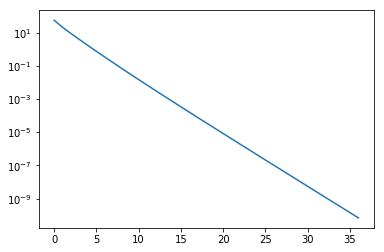

In [11]:
x = linear_gmg.solve(rhs, x0, tol=1e-10)
print(linear_gmg.get_gmg_convergence())
plt.semilogy(linear_gmg.get_gmg_convergence())

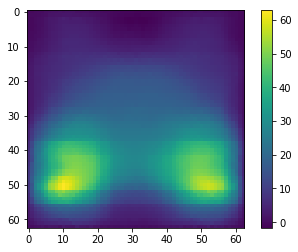

In [12]:
x = x.reshape(A.dim)
plt.imshow(x)
plt.colorbar()

## AMG

In [13]:
amg_solver = classical_amg.ClassicalAMG(A, num_levels)
AMG_rho = amg_solver.compute_rho()
print(amg_solver)
print("AMG spectral radius = {}".format(AMG_rho))

multilevel_solver
Number of Levels:     2
Operator Complexity:  1.852
Grid Complexity:      1.495
Coarse Solver:        'pinv2'
  level   unknowns     nonzeros
    0         3969        19593 [53.98%]
    1         1965        16701 [46.02%]

AMG spectral radius = 0.3920705773114676


[65.42299163202162, 134.77648175583582, 19.392932594896877, 3.386861653277771, 0.783509099841938, 0.2714084499277672, 0.11924094482960454, 0.05607466158344249, 0.026856462980624208, 0.012961431042734945, 0.006287964665242867, 0.0030644282865447004, 0.0015002135576356716, 0.0007379454934303018, 0.0003648715214887438, 0.00018143547924186722, 9.078497820848296e-05, 4.5735624434584825e-05, 2.3208892388537698e-05, 1.1867804311675942e-05, 6.11625848888069e-06, 3.176857503983037e-06, 1.662700054544536e-06, 8.765176642460177e-07, 4.651562640513008e-07, 2.4833912672451706e-07, 1.332888589893229e-07, 7.18681915078406e-08, 3.890261854129729e-08, 2.1127506192750593e-08, 1.150544502242605e-08, 6.279598325138876e-09]


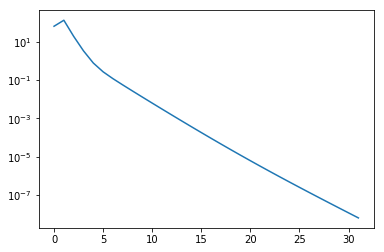

In [14]:
amg_solver = pyamg.classical.classical.ruge_stuben_solver(A.to_csr(), max_levels=num_levels, 
                                                                        max_coarse=1)
pyamg.relaxation.smoothing.change_smoothers(amg_solver,presmoother=("jacobi", {"omega": 2./3, "iterations": 2, "withrho": False}),postsmoother=("None"))
AMGres = []
x = amg_solver.solve(rhs, tol=1e-10,residuals=AMGres)
print(AMGres)
plt.semilogy(AMGres)

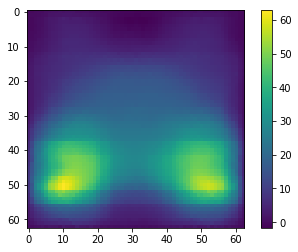

In [15]:
plt.imshow(x.reshape([n,n]))
plt.colorbar()

## DMM

In [16]:
x0 = np.random.randn(A.shape)
x = np.linspace(0, 1, num=n+1, endpoint=False)
y = np.linspace(0, 1, num=n+1, endpoint=False)
xx, yy = np.meshgrid(x[1:], y[1:])
rhs = rightf(xx,yy)/ (n+1)**2
rhs = rhs.reshape(A.shape, 1)

In [17]:
PR_stencil_type = "m9p"
gmm = dgmg.DeepMG(A, PR_stencil_type=PR_stencil_type, max_levels=num_levels)
num_iter = 2500
step_size = 1e-4
opt_par = gmm.optimize(num_iter=num_iter, step_size=step_size)

Iteration 100/2500
Upper bound estimation = 0.5063340952425931
Iteration 200/2500
Upper bound estimation = 0.47582077632386405
Iteration 300/2500
Upper bound estimation = 0.46576488855262865
Iteration 400/2500
Upper bound estimation = 0.443197724516453
Iteration 500/2500
Upper bound estimation = 0.4124115597687572
Iteration 600/2500
Upper bound estimation = 0.40119239900418124
Iteration 700/2500
Upper bound estimation = 0.35804365985192443
Iteration 800/2500
Upper bound estimation = 0.3440270990854902
Iteration 900/2500
Upper bound estimation = 0.3422773698634496
Iteration 1000/2500
Upper bound estimation = 0.3282393882966475
Iteration 1100/2500
Upper bound estimation = 0.3408860789752949
Iteration 1200/2500
Upper bound estimation = 0.3150019638879027
Iteration 1300/2500
Upper bound estimation = 0.3083474021319601
Iteration 1400/2500
Upper bound estimation = 0.3054725043945106
Iteration 1500/2500
Upper bound estimation = 0.29818037870383657
Iteration 1600/2500
Upper bound estimation = 

In [18]:
print(gmm)
convergence = gmm.get_optimizer_convergence()
conv_time = gmm.get_optimization_time()
gmm.update_prd(opt_par)
DMM_rho = gmm.compute_rho()
print("DMM rho = {}".format(DMM_rho))

Dimension of matrix A for levels:
Level = 0, dimension = (31, 31)
Level = 1, dimension = (63, 63)

DMM rho = 0.2307032106017913


[2.04009224e+02 5.01358937e+01 9.62593034e+00 1.08221355e+00
 1.80818710e-01 2.00087270e-02 2.94976701e-03 4.13110796e-04
 7.89319863e-05 1.60761277e-05 3.47342170e-06 7.65884034e-07
 1.71396785e-07 3.87280905e-08 8.80311149e-09 2.00930373e-09
 4.59931917e-10 1.05556386e-10 2.42679928e-11]


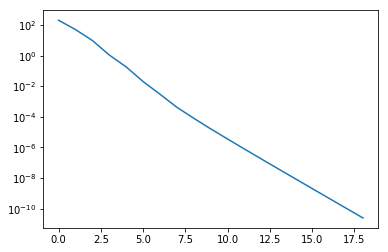

In [19]:
x = gmm.solve(rhs, x0, tol=1e-10)
print(gmm.get_gmg_convergence())
plt.semilogy(gmm.get_gmg_convergence())

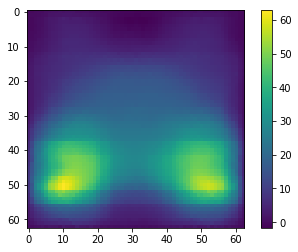

In [20]:
x = x.reshape(A.dim)
plt.imshow(x)
plt.colorbar()

## Compare

In [21]:
print("Radius of GMM={}".format(GMM_rho))
print("Radius of AMG={}".format(AMG_rho))
print("Radius of DMM={}".format(DMM_rho))

Radius of GMM=0.4853871374259105
Radius of AMG=0.3920705773114676
Radius of DMM=0.2307032106017913


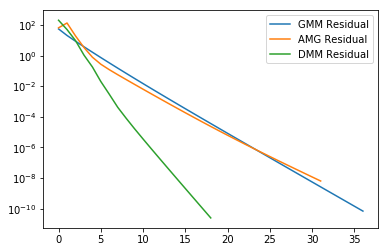

In [22]:
plt.semilogy(linear_gmg.get_gmg_convergence(), label = 'GMM Residual')
plt.semilogy(AMGres,label = "AMG Residual")
plt.semilogy(gmm.get_gmg_convergence(), label = 'DMM Residual')
plt.legend(loc='upper right')

In [23]:
print("GMM_rho : AMG_rho : DMM_rho = 1 : %f : %f" %(AMG_rho/GMM_rho,DMM_rho/GMM_rho))

GMM_rho : AMG_rho : DMM_rho = 1 : 0.807748 : 0.475297


## R, P and  $\omega$ after Optimization

The initial P, R in code is

P matrix:

[[0.25 0.5  0.25]

[0.5  1.   0.5 ]

[0.25 0.5  0.25]]

R matrix:

[[[0.0625 0.125  0.0625]

[0.125  0.25   0.125 ]

[0.0625 0.125  0.0625]]  

In [24]:
np.set_printoptions(threshold=np.inf)
print("omega = {}".format(opt_par[2]))

omega = 0.8158498735459011


In [25]:
P = opt_par[0][0]
k = int(2**(np.log2(n+1)-1)-1) 
P_Matrix = np.zeros([n**2,k**2])
for i in range(k):
    for j in range(k):
        C = P[i][j]
        for l in range(3):
            for m in range(3):
                P_Matrix[n*(2*i+l)+(2*j+m)][k*i+j] = C[l][m]
workbook = xlsxwriter.Workbook('P_nonlinearPoisson.xlsx')
worksheet = workbook.add_worksheet()
for col, data in enumerate(P_Matrix):
    worksheet.write_column(0, col, data)
workbook.close()

In [26]:
R = opt_par[1][0]
R_Matrix = np.zeros([k**2,n**2])
for i in range(k):
    for j in range(k):
        C = R[i][j]
        for l in range(3):
            for m in range(3):
                R_Matrix[k*i+j][n*(2*i+l)+(2*j+m)] = C[l][m]
workbook = xlsxwriter.Workbook('R_nonlinearPoisson.xlsx')
worksheet = workbook.add_worksheet()
for col, data in enumerate(R_Matrix):
    worksheet.write_column(0, col, data)
workbook.close()